## Import Modules and Load Dataset

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 47.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
# sns.set_theme(style="whitegrid")
# sns.set_palette("hls")

import category_encoders as ce
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [ ]:
print(train.shape)
print("*" * 20)
print(test.shape)


(1460, 81)
********************
(1459, 80)


In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Remove ID

In [ ]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1,  inplace=True)

## Exploratory Data Analysis

In [ ]:
print(train.info())
print("*"*50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Data train memiliki 80 fitur + 1 target (SalePrice) dengan 1460 data, terdapat beberapa kolom yang memiliki missing value.

Data test memiliki 80 fitur dengan 1469 data, terdapat beberapa kolom yang memiliki missing value.

In [ ]:
train["MasVnrType"].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [ ]:
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  37
Number of Categorical features:  43


In [ ]:
train[numerical_feats].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train[categorical_feats].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
train.skew()

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

Dari data di atas, terdapat beberapa fitur yang memiliki tingkat skewness yang tinggi ke kanan yaitu
1. LotArea
2. BsmtFinSF2
3. LowQualFinSF
4. BsmtHalfBath
5. KitchenAbvGr
6. 3SsnPorch
7. ScreenPorch
8. PoolArea
9. MiscVal

### Check Missing Value

In [ ]:
def calculate_missing_data(dataset):
    total_missing = dataset.isnull().sum()
    percent_missing = (dataset.isnull().sum() / len(dataset)).round(4) * 100

    missing_data = pd.DataFrame({'Feature': total_missing.index, 'Total': total_missing.values, 'Percent': percent_missing.values})
    missing_data = missing_data[missing_data['Total'] > 0].sort_values(by='Percent', ascending=False)

    return missing_data

#### Train Data

In [ ]:
train_missing_data = calculate_missing_data(train)
train_missing_data

,Feature,Total,Percent
71,PoolQC,1453,99.52
73,MiscFeature,1406,96.30
5,Alley,1369,93.77
72,Fence,1179,80.75
56,FireplaceQu,690,47.26
2,LotFrontage,259,17.74
57,GarageType,81,5.55
58,GarageYrBlt,81,5.55
59,GarageFinish,81,5.55
62,GarageQual,81,5.55


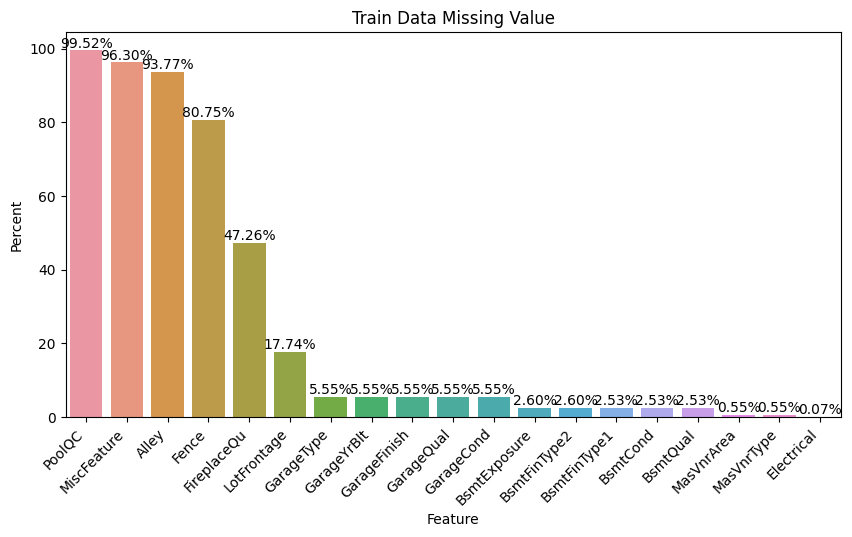

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=train_missing_data['Feature'], y=train_missing_data['Percent'])
ax.set_title("Train Data Missing Value")

for index, value in enumerate(train_missing_data['Percent']):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.show()

Terdapat 19 fitur yang memiliki missing value. Terdapat 4 fitur  diantaranya yang memiliki missing value di atas 80% yaitu PoolQC, MiscFeature, Alley, dan Fence. Fitur ini akan di drop karena memiliki missing value yang terlalu banyak.

#### Test Data

In [ ]:
test_missing_data = calculate_missing_data(test)
test_missing_data

,Feature,Total,Percent
71,PoolQC,1456,99.79
73,MiscFeature,1408,96.50
5,Alley,1352,92.67
72,Fence,1169,80.12
56,FireplaceQu,730,50.03
2,LotFrontage,227,15.56
63,GarageCond,78,5.35
58,GarageYrBlt,78,5.35
62,GarageQual,78,5.35
59,GarageFinish,78,5.35


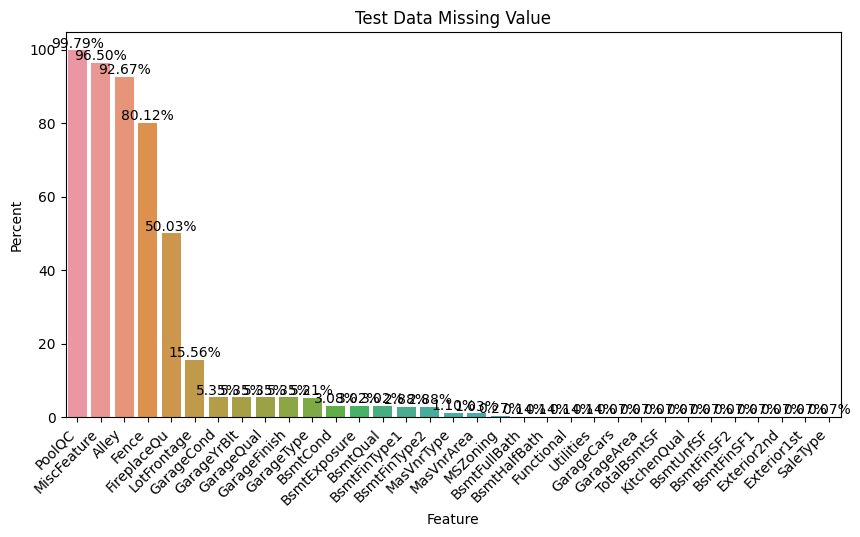

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=test_missing_data['Feature'], y=test_missing_data['Percent'])
ax.set_title("Test Data Missing Value")

for index, value in enumerate(test_missing_data['Percent']):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.show()

Terdapat 33 fitur yang memiliki missing value. Sama seperti train, terdapat 4 fitur  diantaranya yang memiliki missing value di atas 80% yaitu PoolQC, MiscFeature, Alley, dan Fence. Pada data test, FirplaceQU memiliki missing value yang lebih dari 50%. Maka dari itu, PoolQC, MiscFeature, Alley, Fence, dan FirplaceQU akan di drop karena memiliki missing value yang terlalu banyak.

### Persebaran Harga Rumah

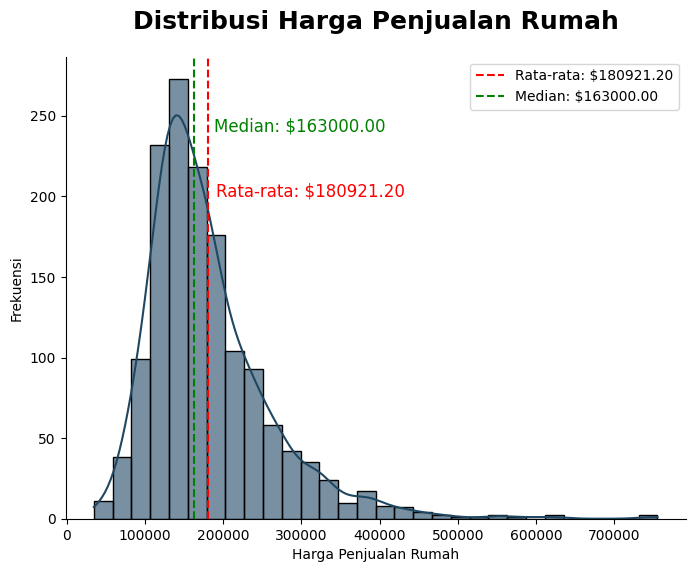

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(8,6)

# set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# membuat plot distribusi harga rumah
sns.histplot(data=train, x='SalePrice', bins=30, kde=True, ax=ax, color='#1f4762', alpha=0.6)

# garis putus-putus untuk nilai rata-rata
mean_sale_price = train['SalePrice'].mean()
ax.axvline(x=mean_sale_price, color='red', linestyle='--', label=f'Rata-rata: ${mean_sale_price:.2f}')

# garis putus-putus untuk nilai median
median_sale_price = train['SalePrice'].median()
ax.axvline(x=median_sale_price, color='green', linestyle='--', label=f'Median: ${median_sale_price:.2f}')

# mengatur label
ax.set_ylabel('Frekuensi')
ax.set_xlabel('Harga Penjualan Rumah')

# menambahkan judul dan deskripsi
plt.title('Distribusi Harga Penjualan Rumah', fontsize=18, pad=20, loc='center', fontweight='bold')

# menambahkan teks untuk nilai rata-rata
plt.text(x=mean_sale_price + 10000, y=200, s=f'Rata-rata: ${mean_sale_price:.2f}', fontsize=12, color='red')

# menambahkan teks untuk nilai median
plt.text(x=median_sale_price + 25000, y=240, s=f'Median: ${median_sale_price:.2f}', fontsize=12, color='green')


# menampilkan legenda
ax.legend()

plt.show()


In [ ]:
# def barplot comparison
def barplot_value(x, y, title):
  chart = sns.barplot(x=x, y=y, ci = None)
  chart.set_title(title)
  for p in chart.patches:
        chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
            textcoords='offset points')
  plt.xticks(rotation=45, ha='right')
  return chart      

### Rumah Dengan Kolam Renang

In [ ]:
train[train.PoolArea>0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [ ]:
pool = train[~train['PoolQC'].isna()][['PoolArea','PoolQC','SalePrice']]
pool

,PoolArea,PoolQC,SalePrice
197,512,Ex,235000
810,648,Fa,181000
1170,576,Gd,171000
1182,555,Ex,745000
1298,480,Gd,160000
1386,519,Fa,250000
1423,738,Gd,274970


In [ ]:
pool_grup = pool.groupby('PoolQC').agg('mean').reset_index()
pool_grup

,PoolQC,PoolArea,SalePrice
0,Ex,533.5,490000.0
1,Fa,583.5,215500.0
2,Gd,598.0,201990.0


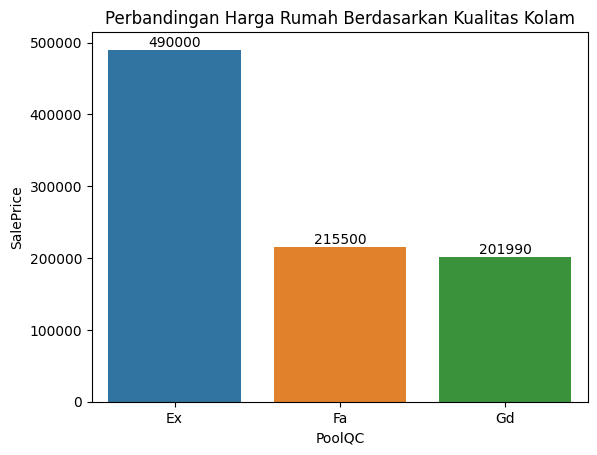

In [ ]:
barplot_value(pool_grup.PoolQC, pool_grup.SalePrice, "Perbandingan Harga Rumah Berdasarkan Kualitas Kolam");

In [ ]:
grouped_data = train.groupby('GarageCars').agg({'SalePrice': 'mean'}).reset_index()

grouped_data.columns = ['GarageCars', 'SalePrice_Mean']
grouped_data

,GarageCars,SalePrice_Mean
0,0,103317.283951
1,1,128116.688347
2,2,183851.663835
3,3,309636.121547
4,4,192655.800000


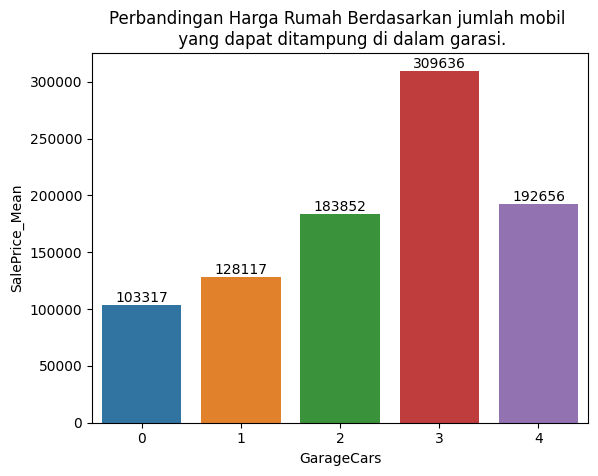

In [ ]:
barplot_value(grouped_data.GarageCars, grouped_data.SalePrice_Mean, "Perbandingan Harga Rumah Berdasarkan jumlah mobil \n yang dapat ditampung di dalam garasi.");

## Preprocessing

### Log Transformation

In [ ]:
feature_skewness = train.skew()
skewed_features = feature_skewness[(feature_skewness > 4) | (feature_skewness < -4)]
skewed_features_df = pd.DataFrame(skewed_features, columns=['Skewness']).sort_values('Skewness', ascending=False)
skewed_features_df

,Skewness
MiscVal,24.476794
PoolArea,14.828374
LotArea,12.207688
3SsnPorch,10.304342
LowQualFinSF,9.011341
KitchenAbvGr,4.488397
BsmtFinSF2,4.255261
ScreenPorch,4.122214
BsmtHalfBath,4.103403


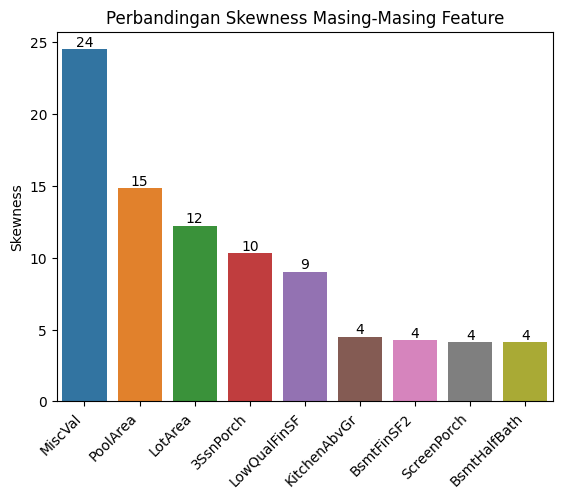

In [ ]:
barplot_value(skewed_features_df.index, skewed_features_df.Skewness, "Perbandingan Skewness Masing-Masing Feature");

In [ ]:
skewed_features = skewed_features.index.tolist()

In [ ]:
for feature in skewed_features:
    train[feature] = np.log1p(train[feature])
    test[feature] = np.log1p(train[feature])

In [ ]:
feature_skewness = train[skewed_features].skew()
feature_skewness

LotArea         -0.137404
BsmtFinSF2       2.523694
LowQualFinSF     7.460317
BsmtHalfBath     3.933064
KitchenAbvGr     3.869414
3SsnPorch        7.734975
ScreenPorch      3.150409
PoolArea        14.363102
MiscVal          5.170704
dtype: float64

#### Log Transform On Target

Skewness: 1.882876
Kurtosis: 6.536282


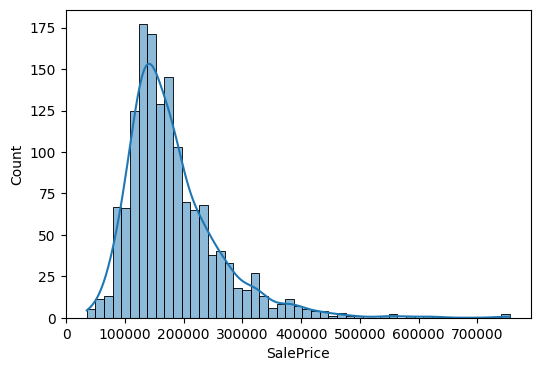

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(train['SalePrice'], kde=True)

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Dapat dilihat bahwa target SalePrice memiliki skew positif ke kanan, hal ini akan berdampak pada keakuratan regresi linear yang akan digunakan. Agar regresi linear dapat dilakukan dengan akuran, log transform akan dilakukan pada target.

In [ ]:
def log_transform(y):
    return np.log1p(y)

# Inverse log transotm akan digunakan pada hasil prediksi data test, untuk mengembalikan nilai ke nilai sebelum log transform
def inverse_log_transform(y_log):
    return np.expm1(y_log)

In [ ]:
train['SalePrice'] = log_transform(train['SalePrice'])

Skewness: 0.121347
Kurtosis: 0.809519


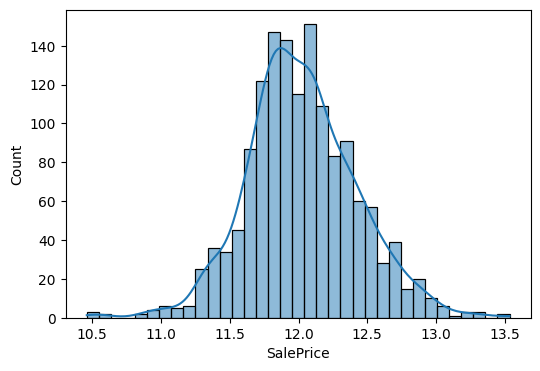

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(train['SalePrice'], kde=True)

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Dapat dilihat, setelah dilakukan log transform, persebaran SalePrice menjadi lebih normal

### Drop Feature With Many Missing Value

In [ ]:
features_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

train = train.drop(columns=features_to_drop)
test = test.drop(columns=features_to_drop)

In [ ]:
train_missing_data = train_missing_data[~train_missing_data['Feature'].isin(features_to_drop)]
test_missing_data = test_missing_data[~test_missing_data['Feature'].isin(features_to_drop)]

### Fill Missing Value

#### Categorical Feature

In [ ]:
print(len(train_missing_data.Feature))
feature_to_fill = train_missing_data.Feature.tolist()
feature_to_fill

14


['LotFrontage',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

In [ ]:
for feature in feature_to_fill:
  if feature in categorical_feats:
    mode_value = train[feature].mode()[0]
    train[feature].fillna(mode_value, inplace=True)

In [ ]:
print(len(test_missing_data.Feature))
feature_to_fill = test_missing_data.Feature.tolist()
feature_to_fill

28


['LotFrontage',
 'GarageCond',
 'GarageYrBlt',
 'GarageQual',
 'GarageFinish',
 'GarageType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType1',
 'BsmtFinType2',
 'MasVnrType',
 'MasVnrArea',
 'MSZoning',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Functional',
 'Utilities',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 'KitchenQual',
 'BsmtUnfSF',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'Exterior2nd',
 'Exterior1st',
 'SaleType']

In [ ]:
for feature in feature_to_fill:
  if feature in categorical_feats:
    # Menggunakan modus data train
    mode_value = train[feature].mode()[0]

    test[feature].fillna(mode_value, inplace=True)

#### Numerical Feature

In [ ]:
train_missing_data = calculate_missing_data(train)
feature_to_fill = train_missing_data.Feature.tolist()
feature_to_fill

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [ ]:
for feature in feature_to_fill:
    if feature in numerical_feats:
        skewness = train[feature].skew()

        if -1 < skewness < 1:
            fill_value = train[feature].mean()
        else:
            fill_value = train[feature].median()

        train[feature].fillna(fill_value, inplace=True)

In [ ]:
test_missing_data = calculate_missing_data(test)
feature_to_fill = test_missing_data.Feature.tolist()
feature_to_fill

['LotFrontage',
 'GarageYrBlt',
 'MasVnrArea',
 'BsmtFullBath',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageCars',
 'GarageArea']

In [ ]:
for feature in feature_to_fill:
    if feature in numerical_feats:
        skewness = train[feature].skew()

        if -1 < skewness < 1:
            fill_value = train[feature].mean()
        else:
            fill_value = train[feature].median()

        # Isi data test menggunakan data train
        test[feature].fillna(fill_value, inplace=True)

In [ ]:
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


### Handling Outliers

In [ ]:
def calculate_outliers(column):
  # Calculate the IQR
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1

  # Define lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Filter the column to count outliers
  outliers = column[(column < lower_bound) | (column > upper_bound)]

  # Calculate percentage of outliers
  percentage_outliers = (outliers.shape[0] / column.shape[0]) * 100

  return outliers.shape[0], percentage_outliers

In [ ]:
outliers_info = []

for feature in numerical_feats:
  num_outliers, percentage_outliers = calculate_outliers(train[feature])

  if percentage_outliers > 0:
    outliers_info.append({
        'feature': feature,
        'outlier_count': num_outliers,
        'percentage_outliers': percentage_outliers
    })

outliers_df = pd.DataFrame(outliers_info).sort_values(by='percentage_outliers', ascending=True)
outliers_df

,feature,outlier_count,percentage_outliers
15,BsmtFullBath,1,0.068493
21,GarageYrBlt,1,0.068493
3,OverallQual,2,0.136986
12,2ndFlrSF,2,0.136986
22,GarageCars,5,0.342466
20,Fireplaces,5,0.342466
29,PoolArea,7,0.479452
5,YearBuilt,7,0.479452
7,BsmtFinSF1,7,0.479452
11,1stFlrSF,20,1.369863


Fitur EnclosedPorch dan BsmtFinSF2 merupakan fitur yang memiliki jumlah outlier terbanyak yaitu diatas 10%. Namun, karena dataset yang ada berjumlah sedikit yaitu 1460, outlier tidak akan dihapus

In [ ]:
# def remove_outliers_iqr(dataframe, column_name):
#     # Calculate the IQR
#     Q1 = dataframe[column_name].quantile(0.25)
#     Q3 = dataframe[column_name].quantile(0.75)
#     IQR = Q3 - Q1

#     # Define lower and upper bounds
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Filter the DataFrame to exclude outliers
#     filtered_dataframe = dataframe[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound)]

#     # Display information about the removed outliers
#     outliers_removed = dataframe.shape[0] - filtered_dataframe.shape[0]
#     print(f"Number of outliers removed in '{column_name}': {outliers_removed}")

#     return filtered_dataframe

In [ ]:
# for feature in ['EnclosedPorch', 'BsmtFinSF2']:
#   train = remove_outliers_iqr(train, feature)
#   train.reset_index(drop=True, inplace=True)

### Feature Correlation

#### Numerical Feature

In [ ]:
correlation_results = []
p_value_results = []

for column in numerical_feats:
    # Calculate Pearson correlation coefficient (r) and p-value (p)
    r, p = stats.pearsonr(train[column], train['SalePrice'])

    correlation_results.append(r)
    p_value_results.append(p)

corr_train = pd.DataFrame({
    'Feature': numerical_feats,
    'pearson_correlation': correlation_results,
    'p_value': p_value_results
})

corr_train = corr_train.reindex(corr_train['pearson_correlation'].abs().sort_values(ascending=False).index)
corr_train = corr_train.sort_values(by='p_value', ascending=True)

corr_train['correlation_description'] = corr_train['pearson_correlation'].apply(lambda r:
    'no correlation' if np.isnan(r) else
    'no correlation' if r == 0 else
    'strong positive' if r >= 0.8 else
    'moderate positive' if r >= 0.5 else
    'weak positive' if r >= 0.3 else
    'weak negative' if r >= -0.3 else
    'moderate negative' if r >= -0.5 else
    'strong negative'
)

corr_train['statistical_significance'] = corr_train['p_value'].apply(lambda p:
  'statistically_significant' if p < 0.05 else
  'not_statistically_significant'
)

corr_train

,Feature,pearson_correlation,p_value,correlation_description,statistical_significance
36,SalePrice,1.000000,0.000000e+00,strong positive,statistically_significant
3,OverallQual,0.817185,0.000000e+00,strong positive,statistically_significant
15,GrLivArea,0.700927,3.058151e-216,moderate positive,statistically_significant
25,GarageCars,0.680625,3.093382e-199,moderate positive,statistically_significant
26,GarageArea,0.650888,1.106027e-176,moderate positive,statistically_significant
11,TotalBsmtSF,0.612134,7.531828e-151,moderate positive,statistically_significant
12,1stFlrSF,0.596981,1.074293e-141,moderate positive,statistically_significant
18,FullBath,0.594771,2.118608e-140,moderate positive,statistically_significant
5,YearBuilt,0.586570,1.103636e-135,moderate positive,statistically_significant
6,YearRemodAdd,0.565608,3.211680e-124,moderate positive,statistically_significant


Terdapat 4 fitur yang memiliki korelasi yang rendah dan secara statistik tidak significant. Fitur-Fitur tersebut adalah

1. YrSold
2. OverallCond
3. BsmtFinSF2
4. BsmtHalfBath


Fitur ini akan di drop karena tidak memiliki pengaruh terhadap target

In [ ]:
corr_train = corr_train[corr_train['pearson_correlation'] > 0.5]
corr_train = corr_train[corr_train['Feature'] != 'SalePrice']
corr_train['Feature'].tolist()

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt']

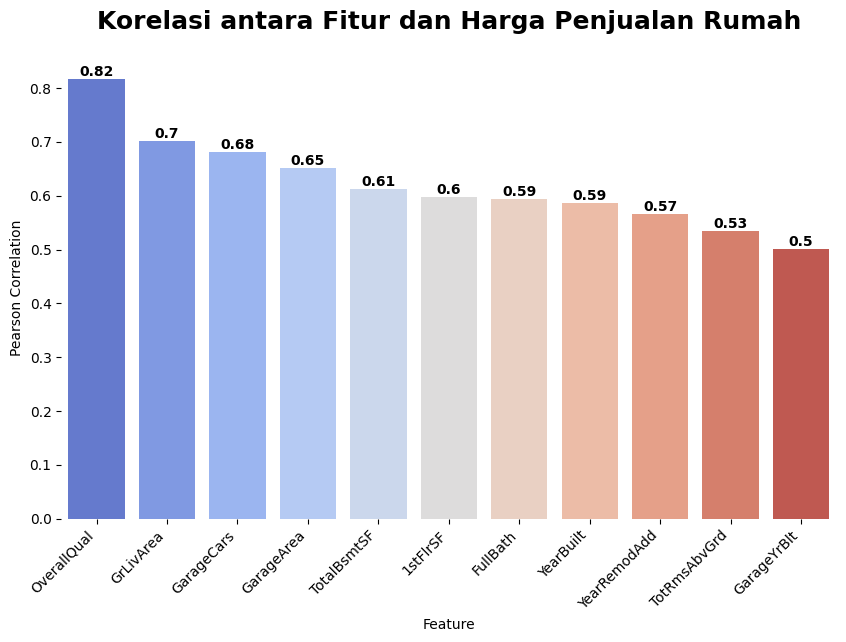

In [ ]:
# Membuat tabel untuk ditampilkan
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

# set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# plot
ax = sns.barplot(x=corr_train['Feature'], y=corr_train['pearson_correlation'], palette='coolwarm')

# mengatur label
plt.ylabel('Pearson Correlation')
plt.xlabel('Feature')

# menambahkan judul dan deskripsi
plt.title('Korelasi antara Fitur dan Harga Penjualan Rumah', fontsize=18, pad=20, loc='center', fontweight='bold')
# plt.text(y=0.9, x=-1, s='Korelasi Pearson menunjukkan kekuatan dan arah hubungan linier antara setiap fitur numerik dengan harga penjualan rumah.', fontsize=12)

# menampilkan teks untuk korelasi
for i in range(len(corr_train)):
    ax.text(x=i, y=corr_train.iloc[i]['pearson_correlation'], s=round(corr_train.iloc[i]['pearson_correlation'],2), 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

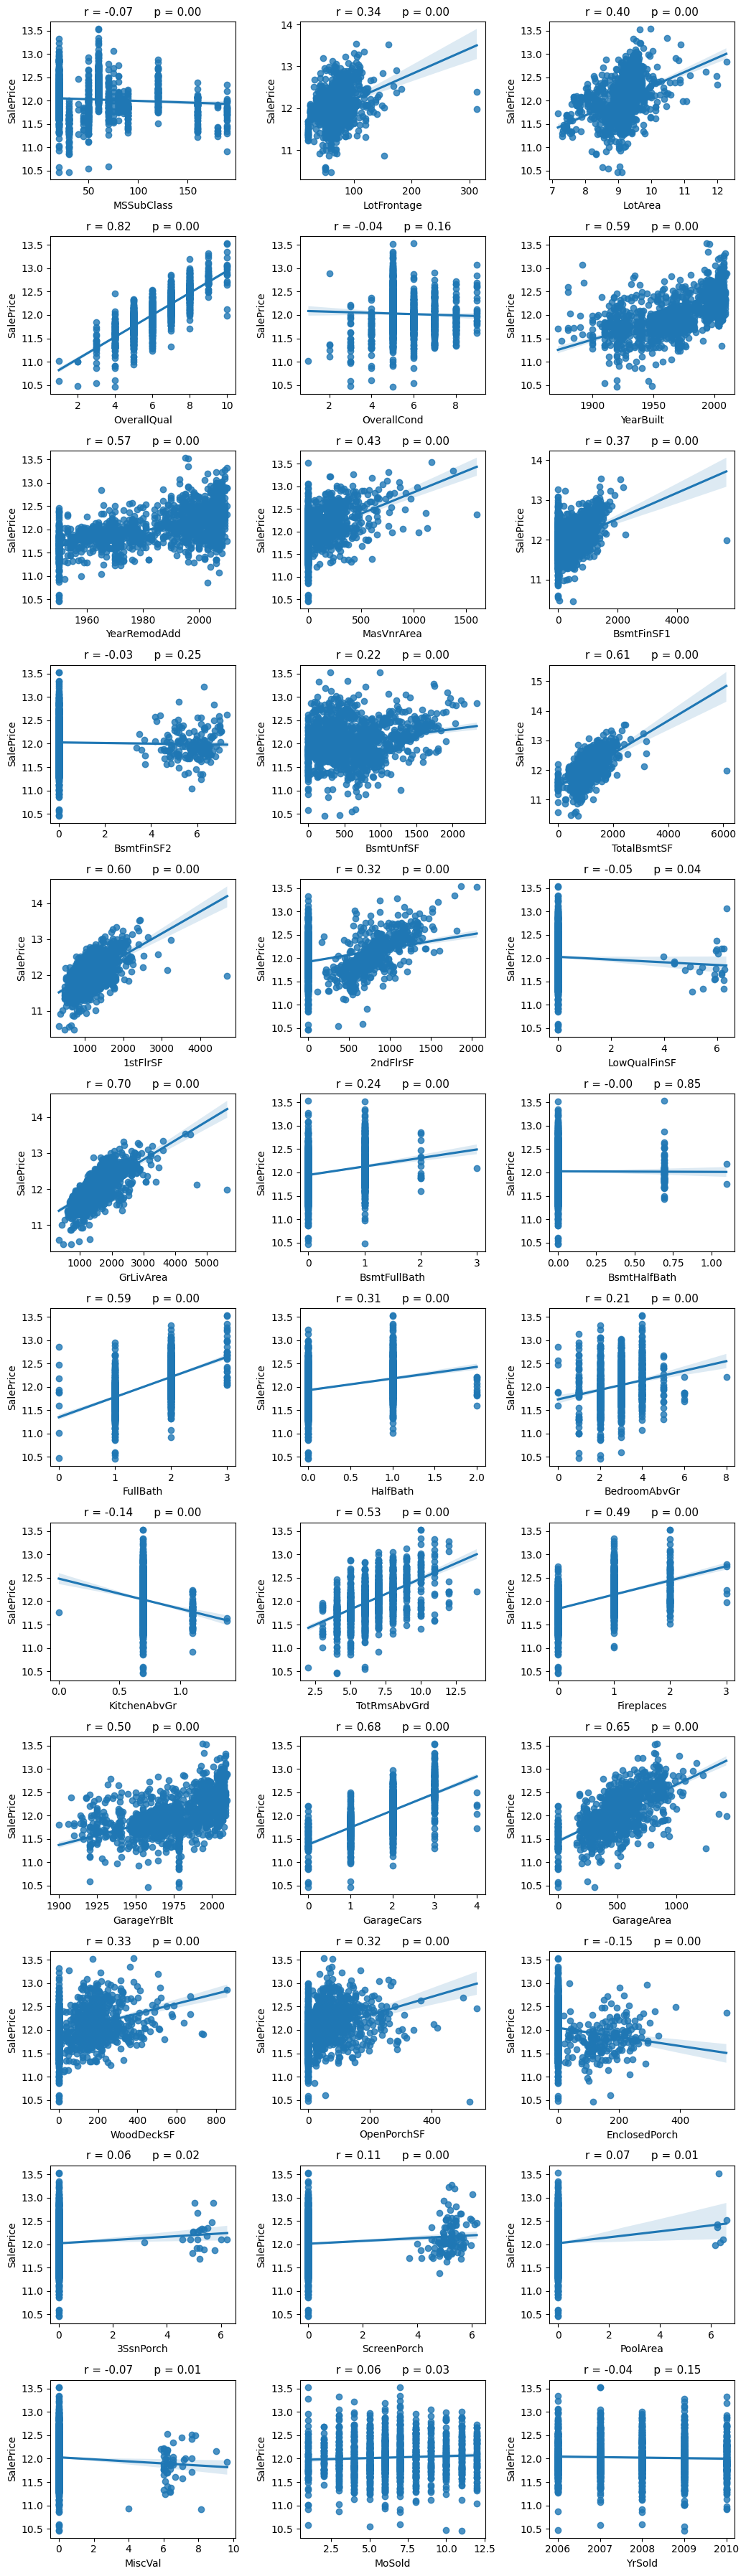

In [ ]:
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['Id', 'SalePrice']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(x=li_plot_num_feats[i], y='SalePrice', data=train, ax=axs[r][c])
            stp = stats.pearsonr(train[li_plot_num_feats[i]], train['SalePrice'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)

plt.tight_layout()
plt.show()

In [ ]:
features_to_drop = ['YrSold', 'OverallCond', 'BsmtFinSF2', 'BsmtHalfBath']
train = train.drop(columns=features_to_drop)
test = test.drop(columns=features_to_drop)

#### Categorical Feature

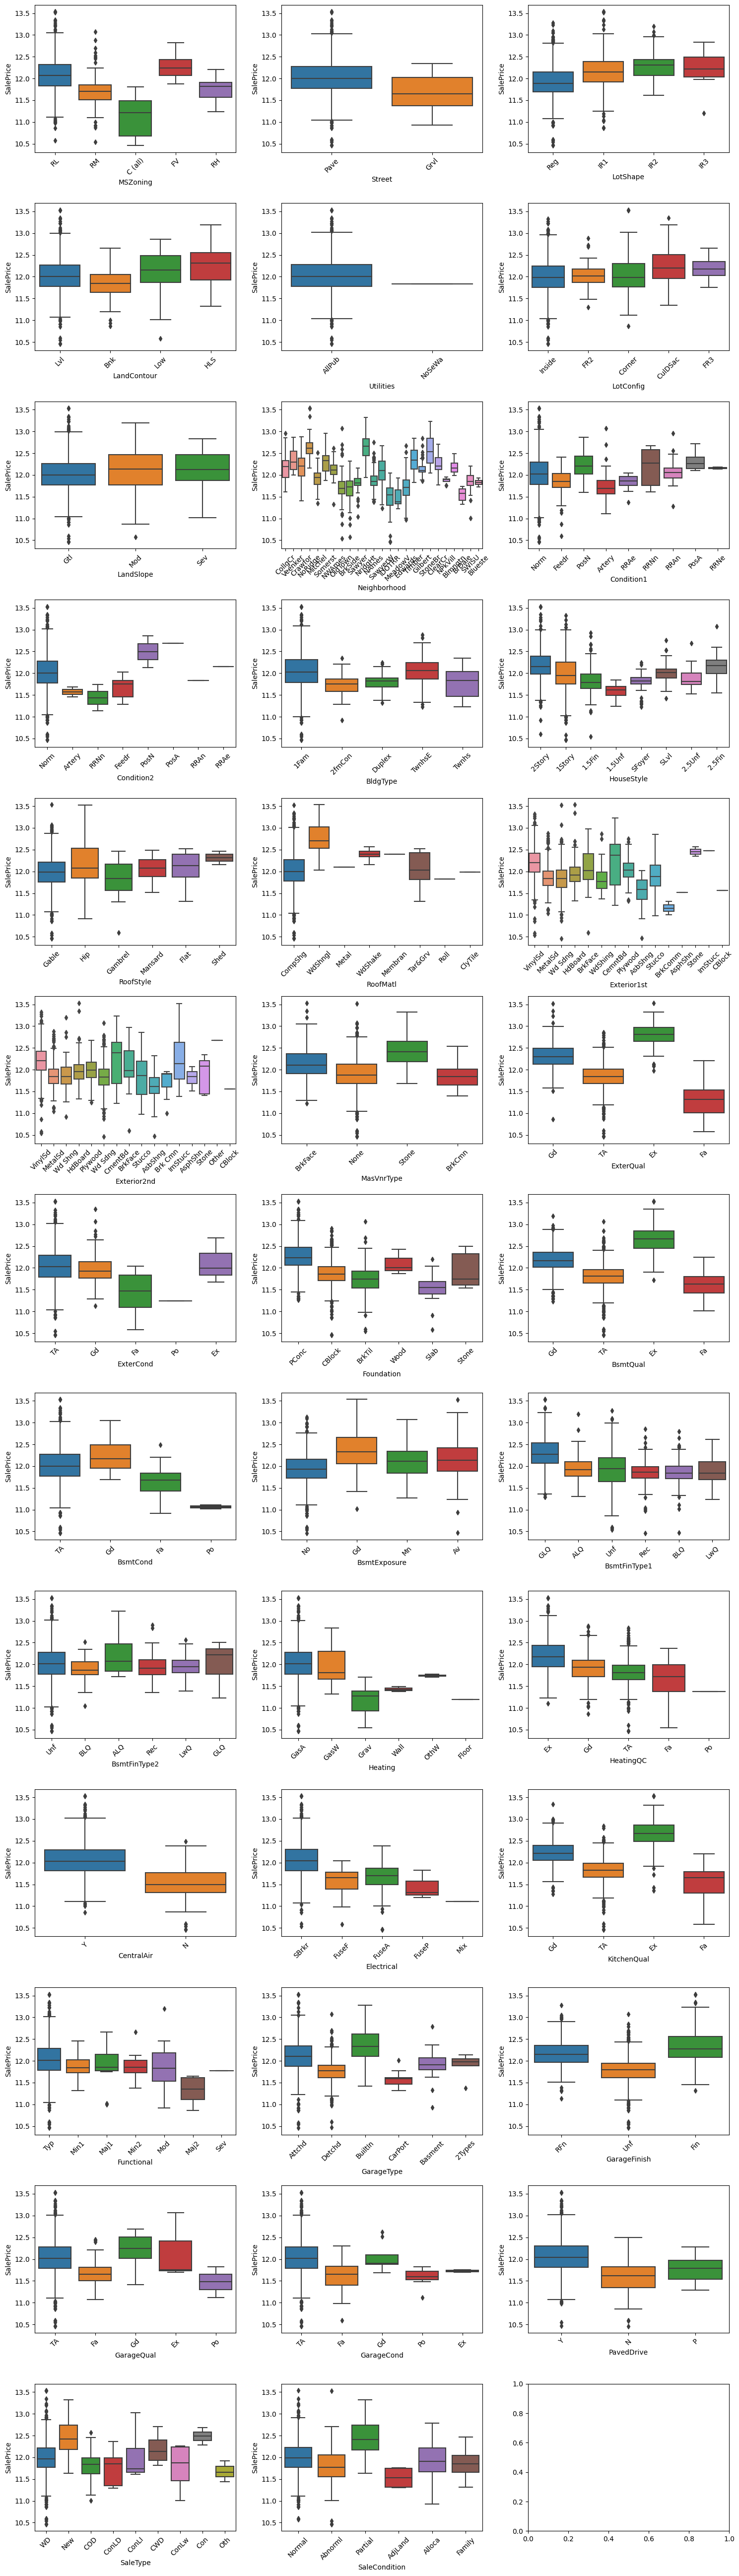

In [ ]:
categorical_feats = train.dtypes[train.dtypes == "object"].index

li_cat_feats = list(categorical_feats)
nr_rows = 13
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*4))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y='SalePrice', data=train, ax = axs[r][c])
            axs[r][c].tick_params(axis='x', labelrotation=45)

plt.tight_layout()

Dari analisa BoxPlot, terdapat beberapa fitur yang memiliki korelasi yang signifikan dengan SalePrice. Hal ini ditandai dengan terpisahnya bagian IQR boxplot pada tiap unique value di fitur kategori tertentu. Fitur-fitur tersebut adalah:
1. MSZoning
2. Neighborhood
3. Condition2
4. MasVnrType
5. ExterQual
6. BsmtQual
7. CentralAir
8. Electrical
9. KitchenQual
10. SaleType

Selain fitur di atas, fitur kategorikal lain akan di drop

In [ ]:
categorical_correlated_feats = ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()

non_categorical_correlated_feats = [feat for feat in categorical_feats if feat not in categorical_correlated_feats]

In [ ]:
train = train.drop(columns=non_categorical_correlated_feats)
test = test.drop(columns=non_categorical_correlated_feats)

### Convert Categorical Feature to Numeric Feature  

In [ ]:
train[categorical_correlated_feats].head()

,MSZoning,Neighborhood,Condition2,MasVnrType,ExterQual,BsmtQual,CentralAir,Electrical,KitchenQual,SaleType
0,RL,CollgCr,Norm,BrkFace,Gd,Gd,Y,SBrkr,Gd,WD
1,RL,Veenker,Norm,None,TA,Gd,Y,SBrkr,TA,WD
2,RL,CollgCr,Norm,BrkFace,Gd,Gd,Y,SBrkr,Gd,WD
3,RL,Crawfor,Norm,None,TA,TA,Y,SBrkr,Gd,WD
4,RL,NoRidge,Norm,BrkFace,Gd,Gd,Y,SBrkr,Gd,WD


In [ ]:
train[categorical_correlated_feats].describe()

,MSZoning,Neighborhood,Condition2,MasVnrType,ExterQual,BsmtQual,CentralAir,Electrical,KitchenQual,SaleType
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,25,8,4,4,4,2,5,4,9
top,RL,NAmes,Norm,None,TA,TA,Y,SBrkr,TA,WD
freq,1151,225,1445,872,906,686,1365,1335,735,1267


Dapat dilihat secara unique value terdapat beberapa feature yang memiliki top frequency terlalu tinggi, hal ini menyebabkan feature tersebut tidak memiliki informasi yang berguna bagi model untuk melakukan regresi

In [ ]:
train.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [ ]:
top_freq_percentages = {}

for feature in categorical_correlated_feats:
    value_counts = train[feature].value_counts()
    top_category = value_counts.idxmax()

    top_freq_percentage = (value_counts[top_category] / len(train)) * 100
    top_freq_percentages[feature] = top_freq_percentage

top_freq_percentages_df = pd.DataFrame.from_dict(top_freq_percentages, orient='index', columns=['top_frequency_percentage']).sort_values('top_frequency_percentage', ascending=False)

top_freq_percentages_df

,top_frequency_percentage
Condition2,98.972603
CentralAir,93.493151
Electrical,91.438356
SaleType,86.780822
MSZoning,78.835616
ExterQual,62.054795
MasVnrType,59.726027
KitchenQual,50.342466
BsmtQual,46.986301
Neighborhood,15.410959


Dari tabel di atas, fitur yang memiliki top_frequency_percentage di atas 75% akan di drop karena pada feature tersebut terdapat satu nilai kategorikal yang terlalu dominan dan hasilnya tidak memberikan informasi penting untuk model melakukan regresi

In [ ]:
features_to_drop = ['Condition2', 'CentralAir', 'Electrical', 'SaleType', 'MSZoning']

train = train.drop(columns=features_to_drop)
test = test.drop(columns=features_to_drop)

In [ ]:
categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()
categorical_feats

['Neighborhood', 'MasVnrType', 'ExterQual', 'BsmtQual', 'KitchenQual']

In [ ]:
train[categorical_feats].describe()

,Neighborhood,MasVnrType,ExterQual,BsmtQual,KitchenQual
count,1460,1460,1460,1460,1460
unique,25,4,4,4,4
top,NAmes,None,TA,TA,TA
freq,225,872,906,686,735


In [ ]:
train.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

Data ExterQual, BsmtQual, dan KitchenQual merupakan data ordinal dengan unique value:

1. Fa : Fair
2. TA : Typical/Average
3. Gd : Good
4. Ex : Excellent

Maka dari itu 3 fitur numeric ini akan di preprocess menggunakan label encoding

In [ ]:
ordinal_feats = ['ExterQual', 'BsmtQual', 'KitchenQual']

quality_mapping = {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}

for feat in ordinal_feats:
    train[feat] = train[feat].map(quality_mapping)
    test[feat] = test[feat].map(quality_mapping)

train[ordinal_feats].head()

,ExterQual,BsmtQual,KitchenQual
0,3,3,3
1,2,3,2
2,3,3,3
3,2,2,3
4,3,3,3


Fitu Neighborhood	dan MasVnrType merupakan data kategorikal nominal, maka binary encoding akan diterapkan untuk mengubah data kategorikal menjadi numerical

In [ ]:
train["Neighborhood"].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [ ]:
train["MasVnrType"].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [ ]:
nominal_feats = ['Neighborhood', 'MasVnrType']
import pickle
for feature in nominal_feats:
    encoder = ce.BinaryEncoder(cols=[feature])

    # Fit transform pada train, test menggunakan fit
    train_encoded = encoder.fit_transform(train[feature])
    pickle.dump(encoder, open('{}.pkl'.format(feature), 'wb'))
    train.drop(columns=[feature], inplace=True)
    train = pd.concat([train, train_encoded], axis=1)

    # Menggunakan encoder hasil train
    test_encoded = encoder.transform(test[feature])

    test.drop(columns=[feature], inplace=True)
    test = pd.concat([test, test_encoded], axis=1)

In [ ]:
sale_price_column = train.pop('SalePrice')
train['SalePrice'] = sale_price_column

In [ ]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,...,MoSold,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,9.110966,6.099315,1971.267808,1984.865753,103.117123,2.39589,2.565068,443.639726,...,6.321918,0.232192,0.470548,0.450000,0.385616,0.427397,0.010274,0.684932,0.392466,12.024057
std,42.300571,22.027677,0.517369,1.382997,30.202904,20.645407,180.731373,0.57428,0.678071,456.098091,...,2.703626,0.422375,0.499303,0.497664,0.486907,0.494870,0.100873,0.464702,0.488467,0.399449
min,20.000000,21.000000,7.170888,1.000000,1872.000000,1950.000000,0.000000,1.00000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,20.000000,60.000000,8.929898,5.000000,1954.000000,1967.000000,0.000000,2.00000,2.000000,0.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.775105
50%,50.000000,69.000000,9.156887,6.000000,1973.000000,1994.000000,0.000000,2.00000,3.000000,383.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.001512
75%,70.000000,79.000000,9.358976,7.000000,2000.000000,2004.000000,164.250000,3.00000,3.000000,712.250000,...,8.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,12.273736
max,190.000000,313.000000,12.279537,10.000000,2010.000000,2010.000000,1600.000000,4.00000,4.000000,5644.000000,...,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.534474


### Scaling

In [ ]:
scaler = StandardScaler()

train_numerical = train.iloc[:, :-1].copy()  # Exclude the last column
test_numerical = test.copy()

In [ ]:
train_scaled = scaler.fit_transform(train_numerical)

# Pada test gunakan transform supaya menggunakan scaler yang sama dengan train
test_scaled = scaler.transform(test_numerical)

In [ ]:
train_scaled_df = pd.DataFrame(train_scaled, columns=train_numerical.columns)
train_scaled_df['SalePrice'] = train['SalePrice']

test_scaled_df = pd.DataFrame(test_scaled, columns=test_numerical.columns)

## End Result

In [ ]:
train_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   float64
 1   LotFrontage     1460 non-null   float64
 2   LotArea         1460 non-null   float64
 3   OverallQual     1460 non-null   float64
 4   YearBuilt       1460 non-null   float64
 5   YearRemodAdd    1460 non-null   float64
 6   MasVnrArea      1460 non-null   float64
 7   ExterQual       1460 non-null   float64
 8   BsmtQual        1460 non-null   float64
 9   BsmtFinSF1      1460 non-null   float64
 10  BsmtUnfSF       1460 non-null   float64
 11  TotalBsmtSF     1460 non-null   float64
 12  1stFlrSF        1460 non-null   float64
 13  2ndFlrSF        1460 non-null   float64
 14  LowQualFinSF    1460 non-null   float64
 15  GrLivArea       1460 non-null   float64
 16  BsmtFullBath    1460 non-null   float64
 17  FullBath        1460 non-null   f

In [ ]:
test_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1459 non-null   float64
 1   LotFrontage     1459 non-null   float64
 2   LotArea         1459 non-null   float64
 3   OverallQual     1459 non-null   float64
 4   YearBuilt       1459 non-null   float64
 5   YearRemodAdd    1459 non-null   float64
 6   MasVnrArea      1459 non-null   float64
 7   ExterQual       1459 non-null   float64
 8   BsmtQual        1459 non-null   float64
 9   BsmtFinSF1      1459 non-null   float64
 10  BsmtUnfSF       1459 non-null   float64
 11  TotalBsmtSF     1459 non-null   float64
 12  1stFlrSF        1459 non-null   float64
 13  2ndFlrSF        1459 non-null   float64
 14  LowQualFinSF    1459 non-null   float64
 15  GrLivArea       1459 non-null   float64
 16  BsmtFullBath    1459 non-null   float64
 17  FullBath        1459 non-null   f

Dapat dilihat semua fitur sudah menjadi numeric dan siap untuk masuk ke model

In [ ]:
train_scaled_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,...,MoSold,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,SalePrice
0,0.073375,-0.220875,-0.133270,0.651479,1.050994,0.878668,0.514104,1.052302,0.641645,0.575425,...,-1.599111,-0.549917,-0.942733,-0.904534,-0.792242,1.157473,-0.101885,-1.474420,1.244184,12.247699
1,-0.872563,0.460320,0.113413,-0.071836,0.156734,-0.429577,-0.570750,-0.689604,0.641645,1.171992,...,-0.489110,-0.549917,-0.942733,-0.904534,1.262240,-0.863951,-0.101885,0.678233,-0.803740,12.109016
2,0.073375,-0.084636,0.420049,0.651479,0.984752,0.830215,0.325915,1.052302,0.641645,0.092907,...,0.990891,-0.549917,-0.942733,-0.904534,-0.792242,1.157473,-0.101885,-1.474420,1.244184,12.317171
3,0.309859,-0.447940,0.103317,0.651479,-1.863632,-0.720298,-0.570750,-0.689604,-0.833633,-0.499274,...,-1.599111,-0.549917,-0.942733,-0.904534,1.262240,1.157473,-0.101885,0.678233,-0.803740,11.849405
4,0.073375,0.641972,0.878431,1.374795,0.951632,0.733308,1.366489,1.052302,0.641645,0.463568,...,2.100892,-0.549917,-0.942733,1.105542,-0.792242,-0.863951,-0.101885,-1.474420,1.244184,12.429220


In [ ]:
test_scaled_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,...,MiscVal,MoSold,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,MasVnrType_0,MasVnrType_1,MasVnrType_2
0,-0.872563,0.460320,-13.156021,-0.795151,-0.340077,-1.156380,-0.570750,-0.689604,-0.833633,0.053428,...,-0.190481,-0.119110,-0.549917,1.060746,1.105542,-0.792242,-0.863951,-0.101885,0.678233,-0.803740
1,-0.872563,0.505733,-13.131610,-0.071836,-0.439440,-1.301740,0.027027,-0.689604,-0.833633,1.051363,...,-0.190481,-0.119110,-0.549917,1.060746,1.105542,-0.792242,-0.863951,-0.101885,-1.474420,1.244184
2,0.073375,0.187842,-13.101691,-0.795151,0.852269,0.636400,-0.570750,-0.689604,0.641645,0.761852,...,-0.190481,-1.229111,1.818457,-0.942733,-0.904534,1.262240,-0.863951,-0.101885,0.678233,-0.803740
3,0.073375,0.369494,-13.132603,-0.071836,0.885390,0.636400,-0.460051,-0.689604,-0.833633,0.347326,...,-0.190481,-0.119110,1.818457,-0.942733,-0.904534,1.262240,-0.863951,-0.101885,-1.474420,1.244184
4,1.492282,-1.219961,-13.057811,1.374795,0.686666,0.345679,-0.570750,1.052302,0.641645,-0.396190,...,-0.190481,-1.969111,1.818457,-0.942733,-0.904534,1.262240,1.157473,-0.101885,0.678233,-0.803740


In [ ]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:
# train_scaled_df.to_csv('./train_preprocessed.csv', index=False)
# test_scaled_df.to_csv('./test_preprocessed.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=79960be5-3388-46e3-82a2-0b0df5ae3fd3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>